In [1]:
mydata <- read.csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")


R PACKAGES

In [2]:
install.packages("corrplot")
library(corrplot)
library(ggplot2)
library(dplyr)
install.packages("factoextra")
library(factoextra)

 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘emmeans’ is not available”
also installing the dependencies ‘flashClust’, ‘FactoMineR’


Warning message in install.packages("factoextra"):
“installation of package ‘FactoMineR’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘factoextra’ had non-zero exit status”


ERROR: Error in library(factoextra): there is no package called ‘factoextra’


MISSING VALUES

In [3]:
total_missing <- sum(is.na(mydata))
total_missing

[1] 2563

REPLACEMENT OF MISSING VALUES WITH MEDIAN

In [5]:
# replace missing values with median for each numeric column (exclude non-numeric columns)
numeric_cols <- sapply(mydata, is.numeric)
mydata[numeric_cols] <- apply(mydata[numeric_cols], 2, function(x) ifelse(is.na(x), median(x, na.rm = TRUE), x))
                             


In [6]:
total_missing <- sum(is.na(mydata))
total_missing

[1] 0

In [7]:
my_data <- mydata[, !names(mydata) %in% c("Measles","BMI","Polio","Diphtheria","Hepatitis.B","thinness..1.19.years","thinness.5.9.years")]


CORRELATION MATRIX

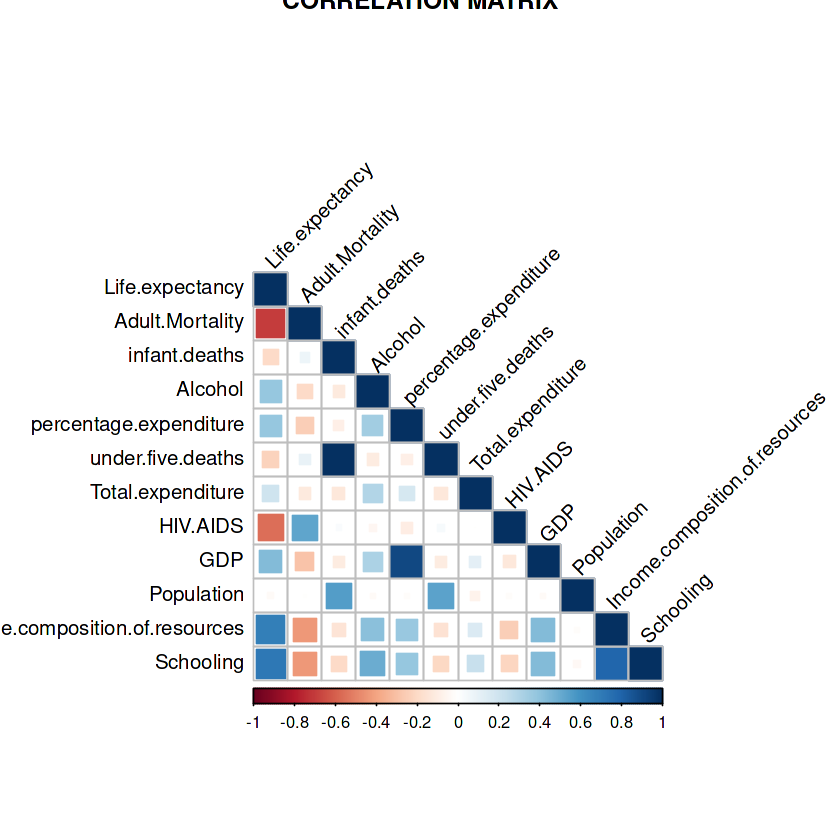

In [8]:
data <- my_data[, !(names(my_data) %in% c("Country","Status", "Year"))]
cor_matrix <- cor(data, use = "pairwise.complete.obs")
corrplot(cor_matrix, method = "square", type = "lower", tl.col="black", tl.srt = 45, title="CORRELATION MATRIX")

BOX PLOT OF LIFE EXPECTANCY THROUGH YEARS

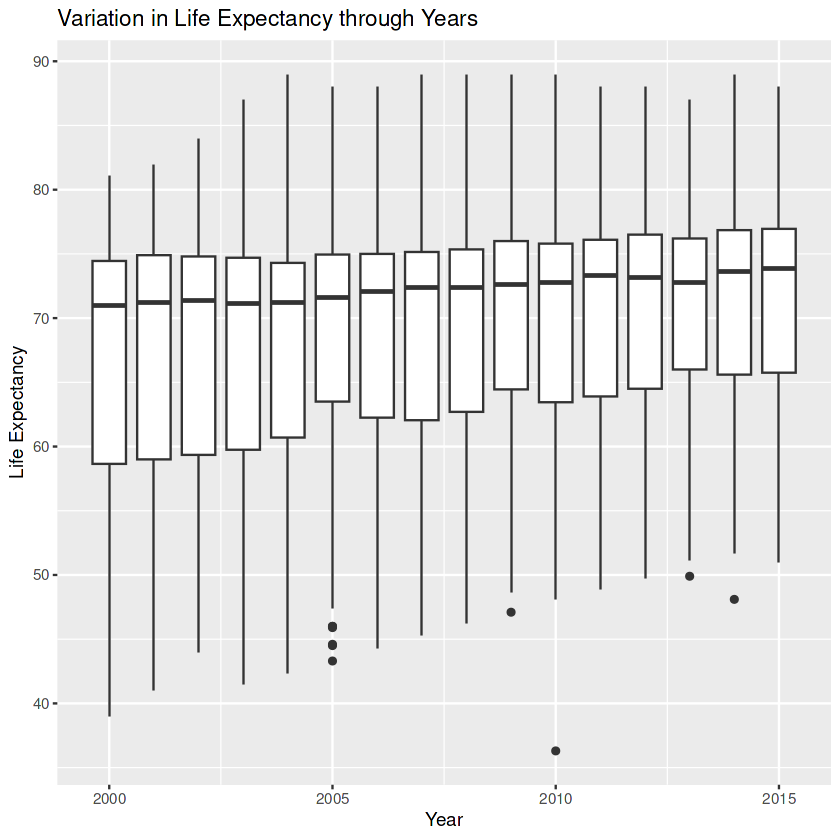

In [9]:
ggplot(my_data, aes(x = Year, y = Life.expectancy, group = Year)) +
  geom_boxplot() +
  labs(x = "Year", y = "Life Expectancy") +
  ggtitle("Variation in Life Expectancy through Years")


ANOVA

In [10]:
set.seed(123)
data <- rnorm(100)
shapiro.test(data)


	Shapiro-Wilk normality test

data:  data
W = 0.99388, p-value = 0.9349


In [ ]:
names(my_data)

In [15]:
# Perform Shapiro-Wilk test for normality
shapiro_result <- shapiro.test(my_data$Schooling)

# Print the test result
print(shapiro_result)



	Shapiro-Wilk normality test

data:  my_data$Schooling
W = 0.97395, p-value < 2.2e-16



In [16]:
# Perform Shapiro-Wilk test for normality
shapiro_result <- shapiro.test(my_data$Adult.Mortality)

# Print the test result
print(shapiro_result)



	Shapiro-Wilk normality test

data:  my_data$Adult.Mortality
W = 0.91654, p-value < 2.2e-16



In [17]:
# Perform Shapiro-Wilk test for normality
shapiro_result <- shapiro.test(my_data$Income.composition.of.resources)

# Print the test result
print(shapiro_result)



	Shapiro-Wilk normality test

data:  my_data$Income.composition.of.resources
W = 0.90257, p-value < 2.2e-16



In [11]:
model <- lm(Life.expectancy ~ Income.composition.of.resources, data = my_data)
anova(model)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Income.composition.of.resources,1,125949.3,125949.34360,2648.455,0
Residuals,2936,139623.8,47.55579,NA,NA


In [12]:
model <- lm(Life.expectancy ~ Schooling, data = my_data)
anova(model)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Schooling,1,135029.4,135029.42438,3036.886,0
Residuals,2936,130543.7,44.46312,NA,NA


In [13]:
model <- lm(Life.expectancy ~ Adult.Mortality, data = my_data)
anova(model)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Adult.Mortality,1,128792.1,128792.11682,2764.518,0
Residuals,2936,136781.0,46.58754,NA,NA


In [14]:
#Checking the significance between Life.expectancy,Income.composition , Schooling and Adult.Mortality
model <- lm(Life.expectancy ~ Income.composition.of.resources + Schooling +  Adult.Mortality , data = my_data)
anova(model)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Income.composition.of.resources,1,125949.34,125949.34360,4800.548,0.000000e+00
Schooling,1,19753.79,19753.78978,752.914,9.591876e-148
Adult.Mortality,1,42892.27,42892.26542,1634.835,1.661185e-284
Residuals,2934,76977.74,26.23645,NA,NA


MULTIPLE REGRESSION

In [ ]:

model <- lm(Life.expectancy ~ Income.composition.of.resources + Schooling + Adult.Mortality, data = my_data)
summary(model)


In [ ]:
names(my_data)

In [ ]:
# Create a scatterplot
plot(mydata$Income.composition.of.resources, mydata$Life.expectancy,
     xlab = "Income.composition.of.resources", ylab = "Life.expectancy",
     main = "Scatterplot of Income Composition vs. Life Expectancy")

# Add a regression line to the scatterplot
abline(lm(mydata$ Life.expectancy ~ mydata$Income.composition.of.resources))


In [ ]:
# Create a scatterplot
plot(mydata$Adult.Mortality, mydata$Life.expectancy,
     xlab = "Adult.Mortality", ylab = "Life.expectancy",
     main = "Scatterplot of Adult.Mortality vs. Life Expectancy")

# Add a regression line to the scatterplot
abline(lm(mydata$Life.expectancy ~ mydata$Adult.Mortality))


In [ ]:
# Create a scatterplot
plot(mydata$Schooling, mydata$Life.expectancy,
     xlab = "Schooling", ylab = "Life.expectancy",
     main = "Scatterplot of Schooling vs. Life Expectancy")

# Add a regression line to the scatterplot
abline(lm(mydata$Life.expectancy ~ mydata$Schooling))


In [ ]:
plot(mydata$Schooling, mydata$Life.expectancy,
     xlab = "Schooling", ylab = "Adult.Mortality",
     main = "Scatterplot of Schooling vs. Adult.Mortality")

# Add a regression line to the scatterplot
abline(lm(mydata$Adult.Mortality ~ mydata$Schooling))


In [ ]:
plot(mydata$Schooling, mydata$Life.expectancy,
     xlab = "Schooling", ylab = "Income.composition.of.resources",
     main = "Scatterplot of Schooling vs.Income.composition.of.resources")

# Add a regression line to the scatterplot
abline(lm(mydata$Income.composition.of.resources ~ mydata$Schooling))


In [ ]:
# Create a scatterplot
plot(mydata$Adult.Mortality, mydata$Life.expectancy,
     xlab = "Adult.Mortality", ylab = "Income.composition.of.resources",
     main = "Scatterplot of Adult.Mortality vs, Income.composition.of.resources")

# Add a regression line to the scatterplot
abline(lm(mydata$Income.composition.of.resources ~ mydata$Adult.Mortality))


In [ ]:
# Load the required package
library(car)

# Fit the multiple regression model
model <- lm(Life.expectancy ~ Adult.Mortality + Income.composition.of.resources + Schooling, data = my_data)

# Calculate the VIF values
vif_values <- vif(model)

# Print the VIF values
print(vif_values)
